# Notebook refactorizado desde sección 2


# Análisis Exploratorio de Datos (EDA) y Preprocesamiento

Este cuaderno realiza un análisis exploratorio de los datos (EDA) enfocado en las variables **numéricas** del dataset. También se sugiere un preprocesamiento orientado a modelos de machine learning supervisados para predecir `TARGET_LABEL_BAD`.

## Cargar datos y Unir datos con columnas

In [2]:
from credit_risk_analysis.EDA.eda_numerico_scripts import load_data

np, plt, sns = load_data()

/Users/marcoustarroz/PycharmProjects/CreditRiskAnalysisProject/credit_risk_analysis/EDA/eda_numerico_scripts.py:34: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  import pandas as pd


## 0. Análisis de nulos

In [3]:
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_de_nulos

pd = analisis_de_nulos()


Análisis de columnas con valores nulos:
----------------------------------------
Columna: EDUCATION_LEVEL.1
  → Nulos: 32338
  → Porcentaje de nulos: 64.68%
  → Sugerencia: ELIMINAR

Columna: MATE_PROFESSION_CODE
  → Nulos: 28884
  → Porcentaje de nulos: 57.77%
  → Sugerencia: ELIMINAR

Columna: PROFESSION_CODE
  → Nulos: 7756
  → Porcentaje de nulos: 15.51%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: OCCUPATION_TYPE
  → Nulos: 7313
  → Porcentaje de nulos: 14.63%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: MONTHS_IN_RESIDENCE
  → Nulos: 3777
  → Porcentaje de nulos: 7.55%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: RESIDENCE_TYPE
  → Nulos: 1349
  → Porcentaje de nulos: 2.70%
  → Sugerencia: CONSERVAR / IMPUTAR

Total de filas del dataframe: 50000



## 1. Clasificación de las variables numéricas

Se clasifican como discretas o continuas según su naturaleza y variedad de valores.

| Variable                       | Tipo                          |
|--------------------------------|-------------------------------|
| PAYMENT_DAY                    | Numérico Discreto             |
| QUANT_ADDITIONAL_CARDS         | Numérico Discreto             |
| POSTAL_ADDRESS_TYPE            | Numérico Discreto             |
| MARITAL_STATUS                 | Numérico Discreto             |
| QUANT_DEPENDANTS               | Numérico Discreto             |
| EDUCATION_LEVEL                | Numérico Discreto             |
| NACIONALITY                    | Numérico Discreto             |
| RESIDENCE_TYPE                 | Numérico Discreto             |
| MONTHS_IN_RESIDENCE            | Numérico Continuo             |
| FLAG_EMAIL                     | Numérico Discreto             |
| PERSONAL_MONTHLY_INCOME        | Numérico Continuo             |
| OTHER_INCOMES                  | Numérico Continuo             |
| FLAG_VISA                      | Numérico Discreto             |
| FLAG_MASTERCARD                | Numérico Discreto             |
| FLAG_DINERS                    | Numérico Discreto             |
| FLAG_AMERICAN_EXPRESS          | Numérico Discreto             |
| FLAG_OTHER_CARDS               | Numérico Discreto             |
| QUANT_BANKING_ACCOUNTS         | Numérico Discreto             |
| QUANT_SPECIAL_BANKING_ACCOUNTS | Numérico Discreto             |
| PERSONAL_ASSETS_VALUE          | Numérico Continuo             |
| QUANT_CARS                     | Numérico Discreto             |
| MONTHS_IN_THE_JOB              | Numérico Continuo             |
| PROFESSION_CODE                | Numérico Discreto             |
| OCCUPATION_TYPE                | Numérico Discreto             |
| MATE_PROFESSION_CODE           | Numérico Discreto             |
| EDUCATION_LEVEL.1              | Numérico Discreto             |
| FLAG_HOME_ADDRESS_DOCUMENT     | Numérico Discreto             |
| FLAG_RG                        | Numérico Discreto             |
| FLAG_CPF                       | Numérico Discreto             |
| FLAG_INCOME_PROOF              | Numérico Discreto             |
| PRODUCT                        | Numérico Discreto             |
| AGE                            | Numérico Continuo o Discreto  |


**Análisis para `PAYMENT_DAY`**  
> * Más concentración el 10 .. pero tampoco indica a mi criterio que los que pagan el 10 sean malos pagagores.
> * Podría valer la pena transformarla a variables categóricas como:
early_month (1–10),
mid_month (11–20),
end_month (21–31),
y observar si así mejora la capacidad predictiva.?????

**Análisis para `QUANT_ADDITIONAL_CARDS`**  

> *Todos los valores son cero.. eliminar ??

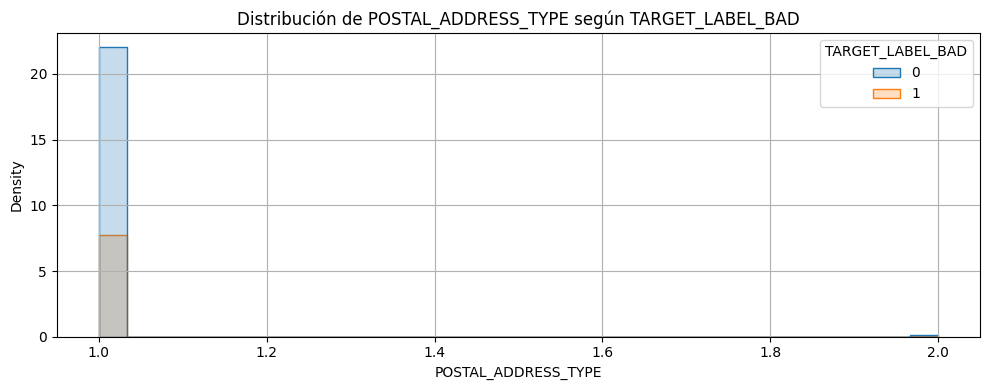

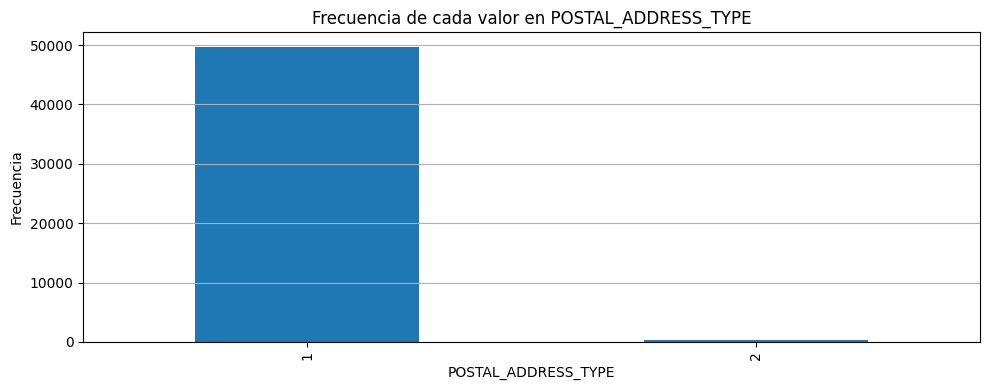

In [4]:
# Ejecutar analisis_para_quant_additional_cards
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_quant_additional_cards
analisis_para_quant_additional_cards()

**Análisis para `POSTAL_ADDRESS_TYPE`**  

> *dado que la gran mayoría de los valores es siempre 1 , tal vez no sea relevante y convenga descartar.

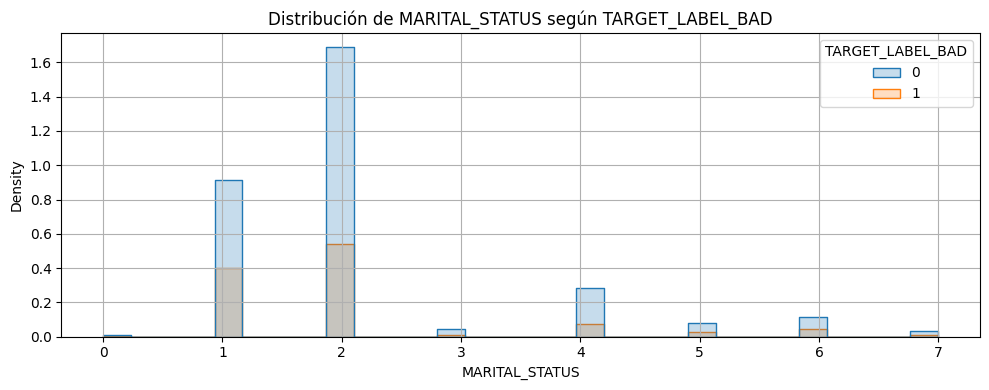

In [5]:
# Ejecutar analisis_para_postal_address_type
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_postal_address_type
analisis_para_postal_address_type()

**Análisis para `MARITAL_STATUS`**  
> *Se observa que quienes tienen  `MARITAL_STATUS` = 2 y 4 tienden a tener mayor proporción de TARGET_LABEL_BAD = 0, lo que sugiere que es un posible indicador de riesgo.

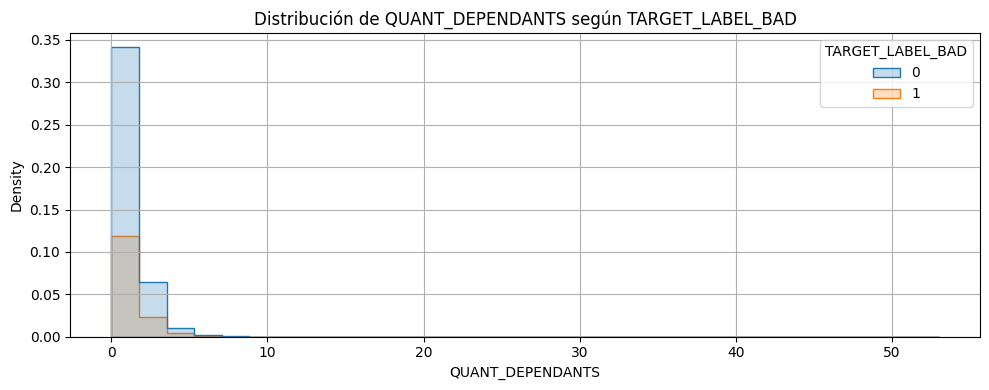

In [6]:
# Ejecutar analisis_para_marital_status
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_marital_status
analisis_para_marital_status()

**Análisis para `QUANT_DEPENDANTS`**  

> *tener cero dependientes está asociado a mejor comportamiento de pago.
A partir de 1 o más dependientes, parece que la proporción de deudores aumenta gradualmente, aunque los datos son pocos

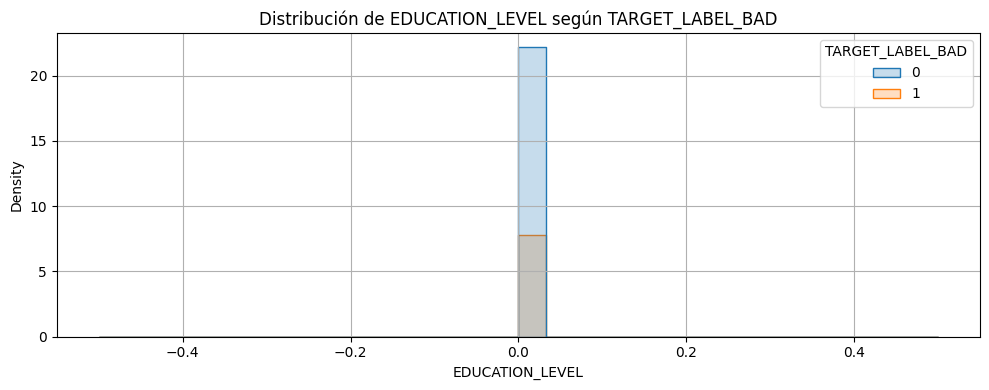

In [7]:
# Ejecutar analisis_para_quant_dependants
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_quant_dependants
analisis_para_quant_dependants()

**Análisis para `EDUCATION_LEVEL`**  
> *el valor es siempre 0.. para descartar

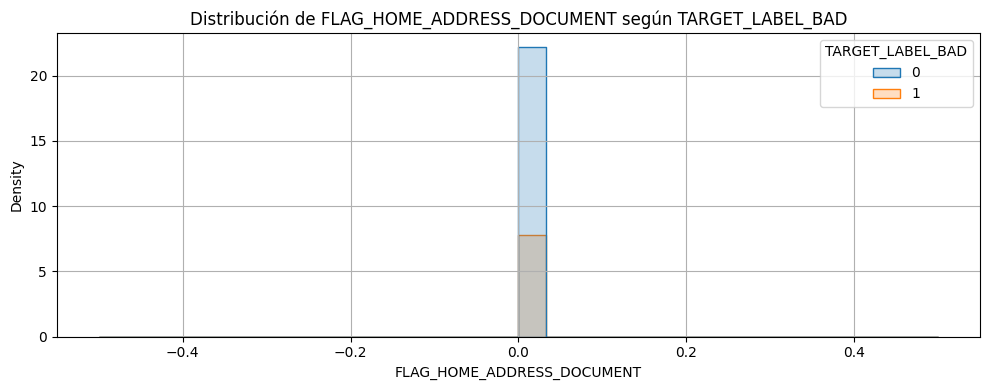

In [8]:
# Ejecutar analisis_para_education_level
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_education_level
analisis_para_education_level()

**Análisis para `NACIONALITY`**  

> *el 95% de los valores son de nacionalidad brasilera (48000 sobre 50000, luego 2000con valor 0 y 2 y 100 con valor 2.. no parece aportar.

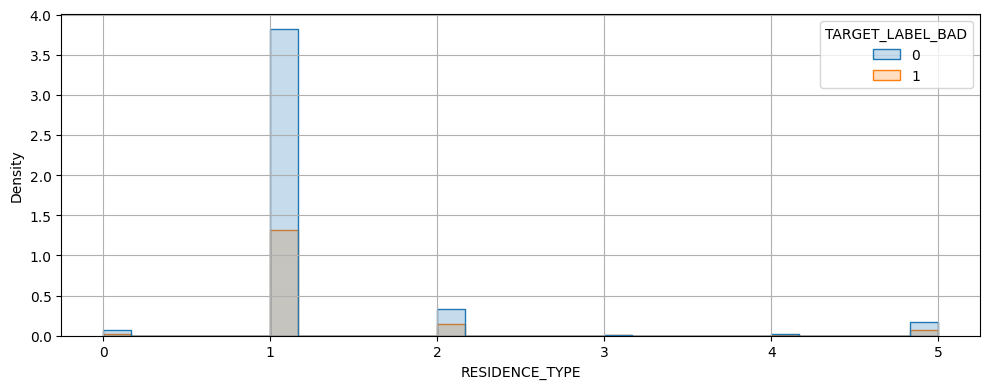

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
RESIDENCE_TYPE                                                             
0.0                           0.717105             0.282895             760
1.0                           0.743914             0.256086           41572
2.0                           0.703399             0.296601            3884
3.0                           0.801418             0.198582             141
4.0                           0.713826             0.286174             311
5.0                           0.710035             0.289965            1983


In [9]:
# Ejecutar analisis_para_nacionality
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_nacionality
analisis_para_nacionality()

**Análisis para `RESIDENCE_TYPE`**  
> *2 y 5 tienen una proporción más alta de deudores, la 3 y 1 tiene menos proporción de deudores.

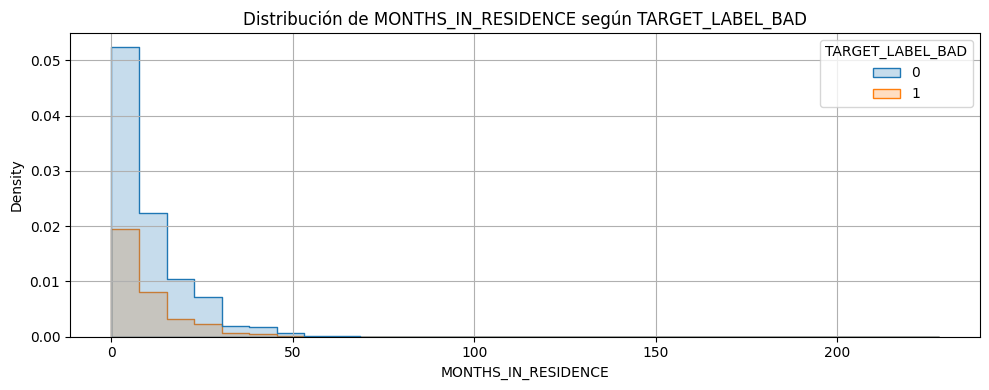

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
RESIDENCE_BIN                                                              
0-6                           0.728384             0.271616           24299
7-12                          0.729680             0.270320            8723
13-24                         0.759077             0.240923            8318
25-60                         0.767350             0.232650            4827
61-120                        0.722222             0.277778              54
120+                          0.000000             1.000000               2


In [10]:
# Ejecutar analisis_para_residence_type
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_residence_type
analisis_para_residence_type()

**Análisis para `MONTHS_IN_RESIDENCE`**  
> * quienes tienen menos `MONTHS_IN_RESIDENCE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1

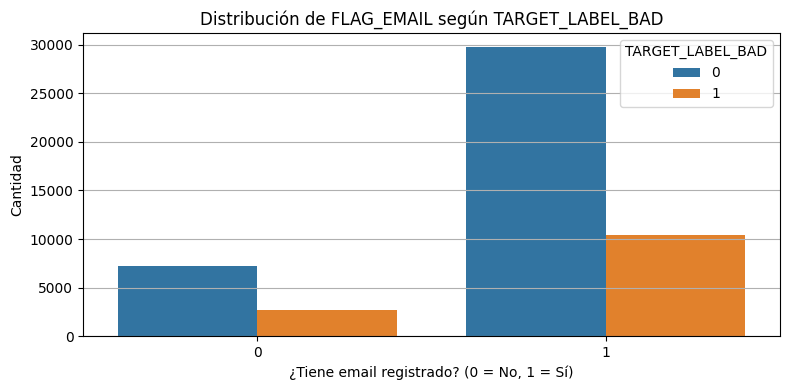

In [11]:
# Ejecutar analisis_para_months_in_residence
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_months_in_residence
analisis_para_months_in_residence()

**Análisis para `FLAG_EMAIL`**  
> *Los clientes que tienen email FLAG_EMAIL = 1 tienen una proporción de deudores de 25.9%, levemente inferior al promedio.
Los que no tienen email ((FLAG_EMAIL = 0) tienen una proporción de deudores de 26.8%. NO PARECE ser muy relevante.

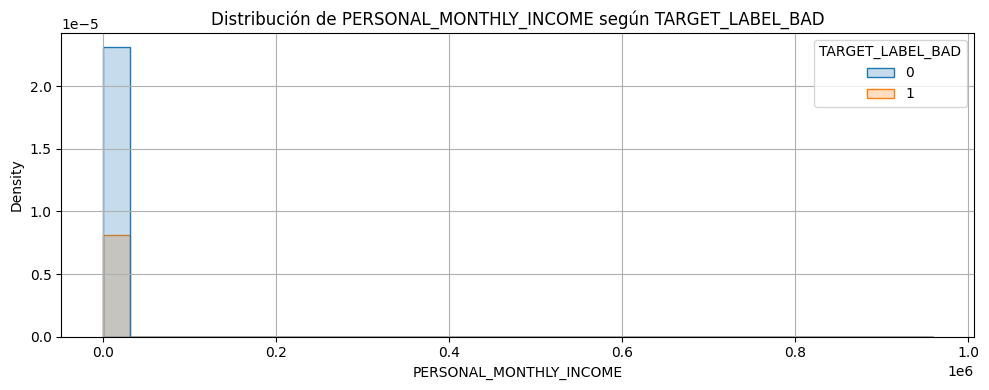

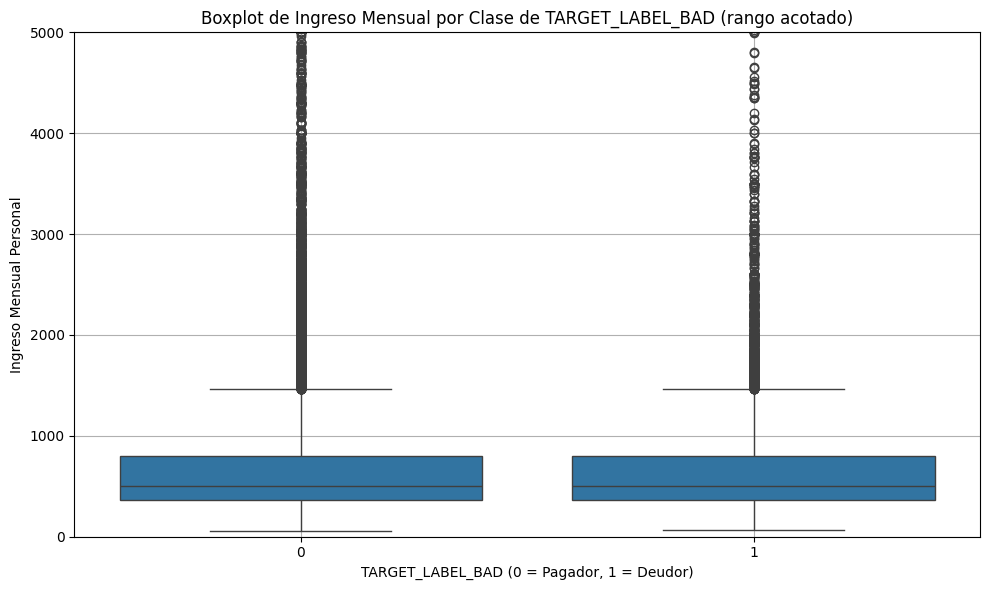

In [12]:
# Ejecutar analisis_para_flag_email
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_email
analisis_para_flag_email()

**Análisis para `PERSONAL_MONTHLY_INCOME`**  
> *muchos outliers en `PERSONAL_MONTHLY_INCOME` , no se ve clara relacíon ingresos-morosidad

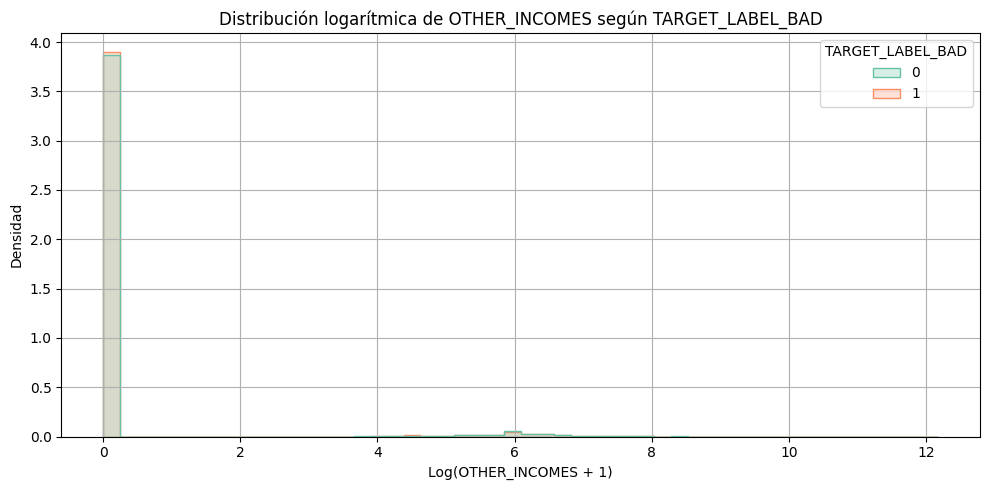

In [13]:
# Ejecutar analisis_para_personal_monthly_income
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_personal_monthly_income
analisis_para_personal_monthly_income()

**Análisis para `OTHER_INCOMES`**  

> *La gran mayoría de los clientes, tanto pagadores (label 0) como deudores (label 1), no tienen otros ingresos o tienen valores mínimos.

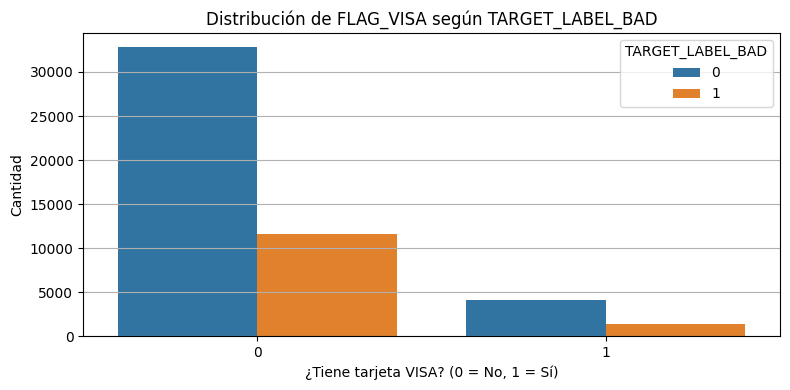

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_VISA                                                                  
0                             0.738341             0.261659           44428
1                             0.745872             0.254128            5572


In [14]:
# Ejecutar analisis_para_other_incomes
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_other_incomes
analisis_para_other_incomes()

**Análisis para `FLAG_VISA`**  

> *Se observa que quienes tienen menos `FLAG_VISA` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1.

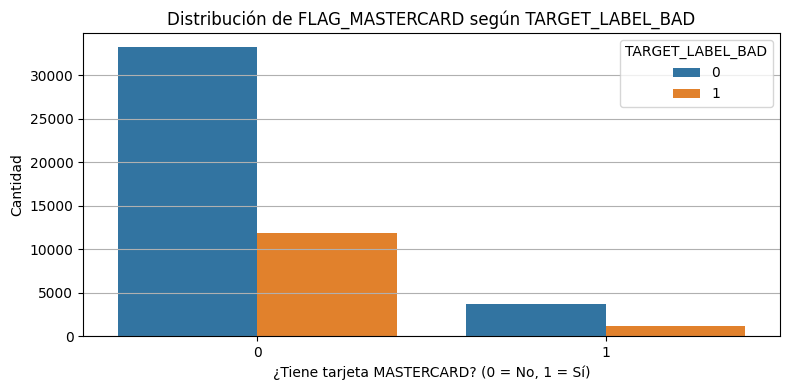

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_MASTERCARD                                                            
0                             0.736632             0.263368           45127
1                             0.762774             0.237226            4873


In [15]:
# Ejecutar analisis_para_flag_visa
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_visa
analisis_para_flag_visa()

**Análisis para `FLAG_MASTERCARD`**  
> * es más marcada que en FLAG_VISA:
>   * Clientes con Mastercard (FLAG_MASTERCARD = 1) tienen una proporción de deudores de 23.7%.
>   * Clientes con (FLAG_MASTERCARD = 0) tienen una proporción de deudores de 26.3%.



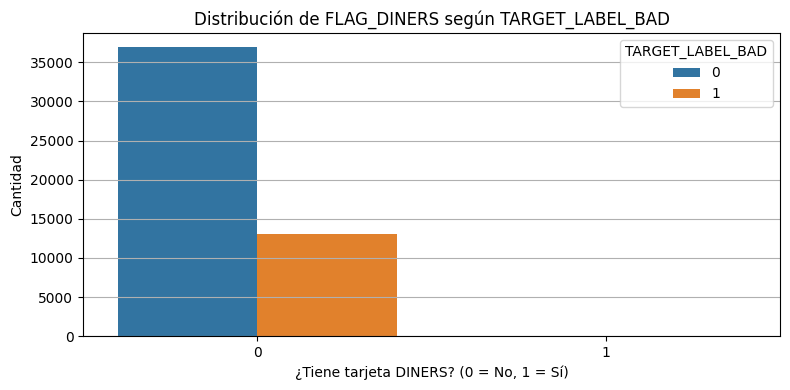

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_DINERS                                                                
0                             0.739216             0.260784           49934
1                             0.712121             0.287879              66


In [16]:
# Ejecutar analisis_para_flag_mastercard
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_mastercard
analisis_para_flag_mastercard()

**Análisis para `FLAG_DINERS`**  
> *El muestreo es muy chico (solo 66 tienen diners) , habría que eliminarlo.

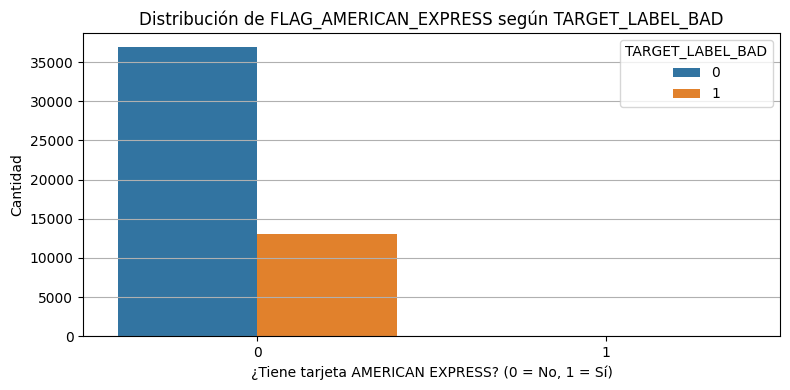

TARGET_LABEL_BAD       Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_AMERICAN_EXPRESS                                                           
0                                  0.739186             0.260814           49913
1                                  0.735632             0.264368              87


In [17]:
# Ejecutar analisis_para_flag_diners
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_diners
analisis_para_flag_diners()

**Análisis para `FLAG_AMERICAN_EXPRESS`**  
> *Solo 66 personas tienen Diners haciendo muy chico el muestreo , tal vez mejor hacer un nuevo feature sumarizando todas las tarjetas

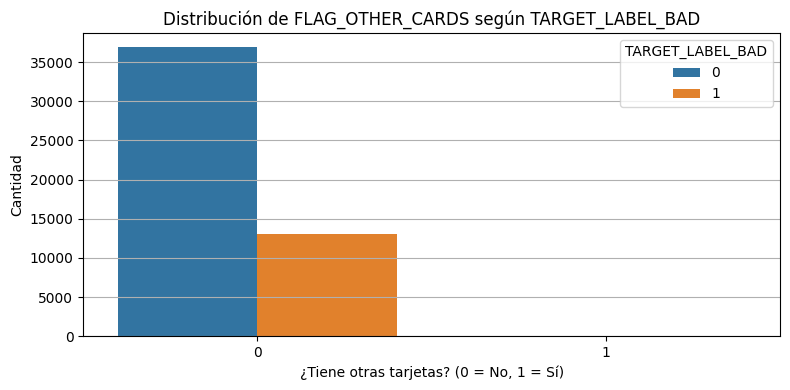

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_OTHER_CARDS                                                           
0                             0.739208             0.260792           49898
1                             0.725490             0.274510             102


In [18]:
# Ejecutar analisis_para_flag_american_express
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_american_express
analisis_para_flag_american_express()

**Análisis para `FLAG_OTHER_CARDS`**  
> *aquellos que tienen otras tarjetas son un poco mas deudores.

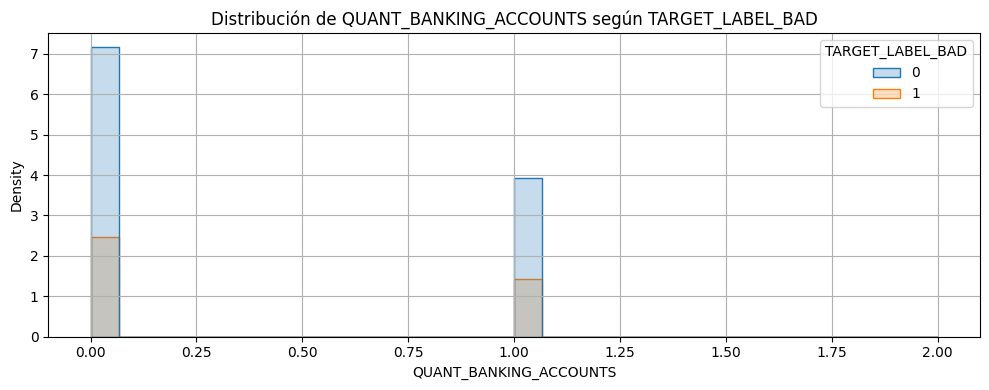

TARGET_LABEL_BAD   Proporción Pagadores  Proporción Deudores  Cantidad Total
CANTIDAD_TARJETAS                                                           
0                              0.737106             0.262894           41804
1                              0.743015             0.256985            5798
2                              0.767200             0.232800            2311
3                              0.764706             0.235294              68
4                              0.631579             0.368421              19


In [19]:
# Ejecutar analisis_para_flag_other_cards
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_other_cards
analisis_para_flag_other_cards()

**Análisis para `QUANT_BANKING_ACCOUNTS`**  
> *Clientes con:
>
>0 cuentas → 25.7% de deudores
>
>1 cuenta → 26.7% de deudores
>
>2 cuentas → ⚠ 57.1% de deudores! pero solo 14 casos, poco representativo
>


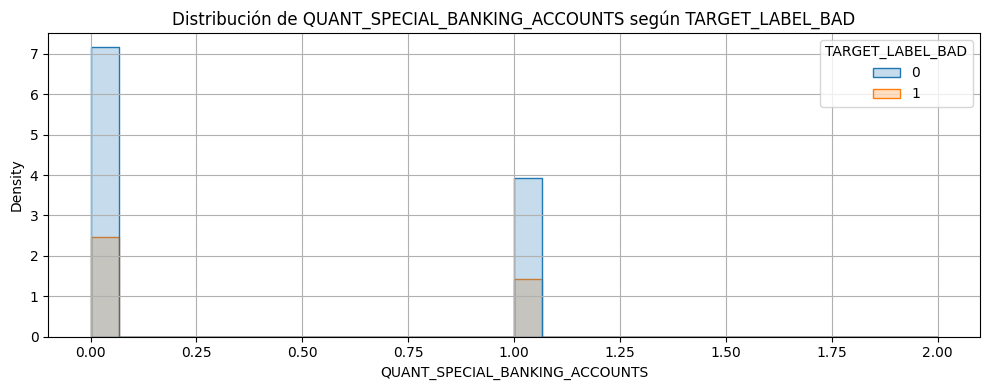

In [20]:
# Ejecutar analisis_para_quant_banking_accounts
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_quant_banking_accounts
analisis_para_quant_banking_accounts()

**Análisis para `QUANT_SPECIAL_BANKING_ACCOUNTS`**  
> *tiene exactamente lo mismo que QUANT_BANKING_ACCOUNTS , eliminar

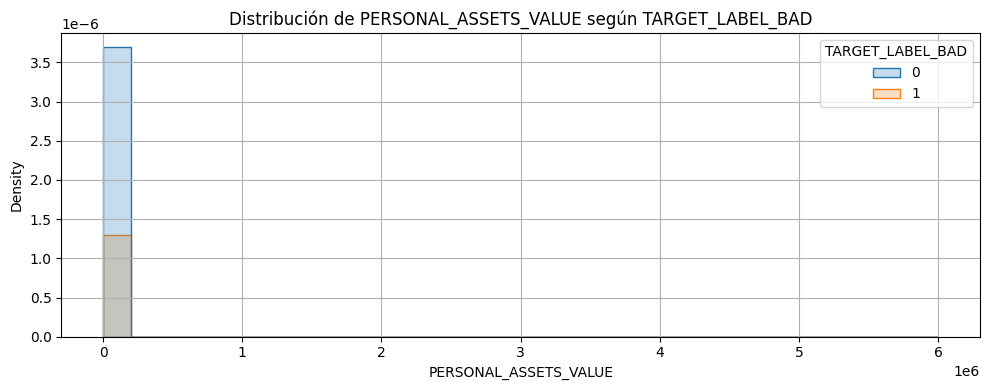

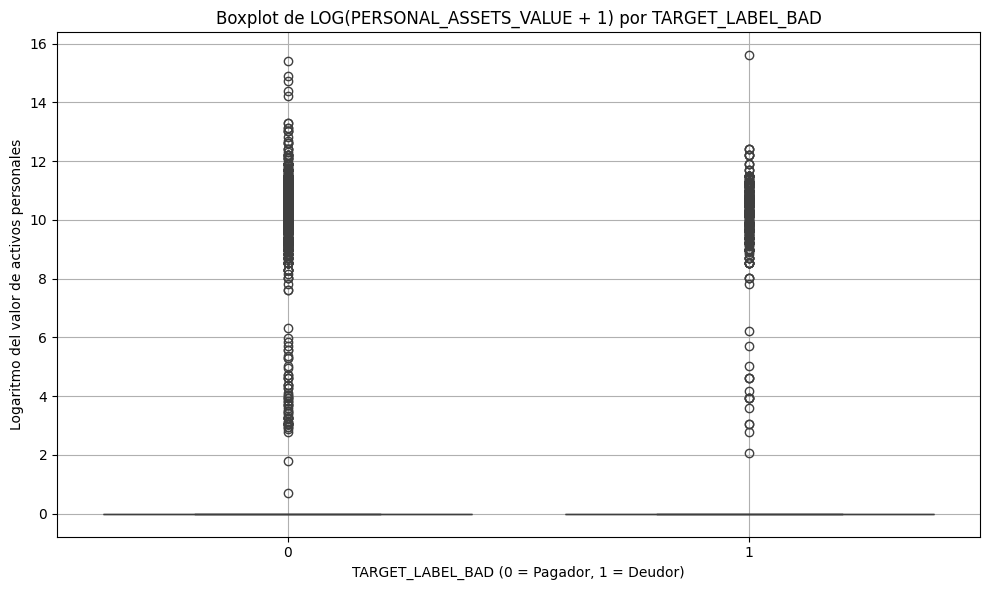

In [21]:
# Ejecutar analisis_para_quant_special_banking_accounts
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_quant_special_banking_accounts
analisis_para_quant_special_banking_accounts()

**Análisis para `PERSONAL_ASSETS_VALUE`**  

> *La mediana es 0 en ambos grupos → la mayoría de los clientes no declaran activos personales.
>
La media es un poco más alta en los pagadores ($2.420 vs. $2.045), pero esa diferencia está inflada por outliers extremos (valores de hasta $6.000.000).

- tal vez haya que crear una feature binaria indicando quien declaró y quien no , combinarla luego con otras features.

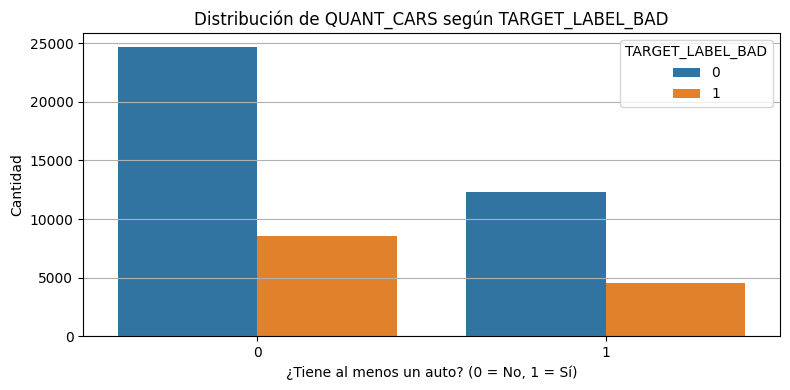

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
QUANT_CARS                                                                 
0                             0.742837             0.257163           33193
1                             0.731957             0.268043           16807


In [22]:
# Ejecutar analisis_para_personal_assets_value
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_personal_assets_value
analisis_para_personal_assets_value()

**Análisis para `QUANT_CARS`**  
> *mimina relación .. los que tienen autos son mínimamente más deudores...

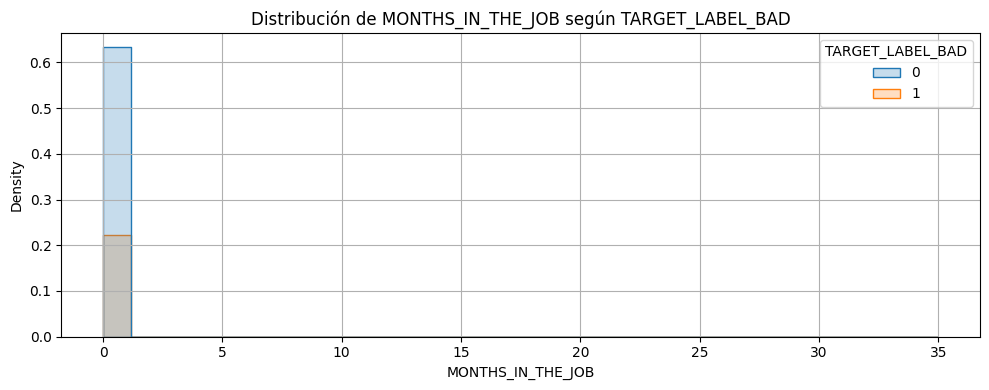

In [23]:
# Ejecutar analisis_para_quant_cars
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_quant_cars
analisis_para_quant_cars()

**Análisis para `MONTHS_IN_THE_JOB`**  

> *el 99.85 % es cero . descartar ?

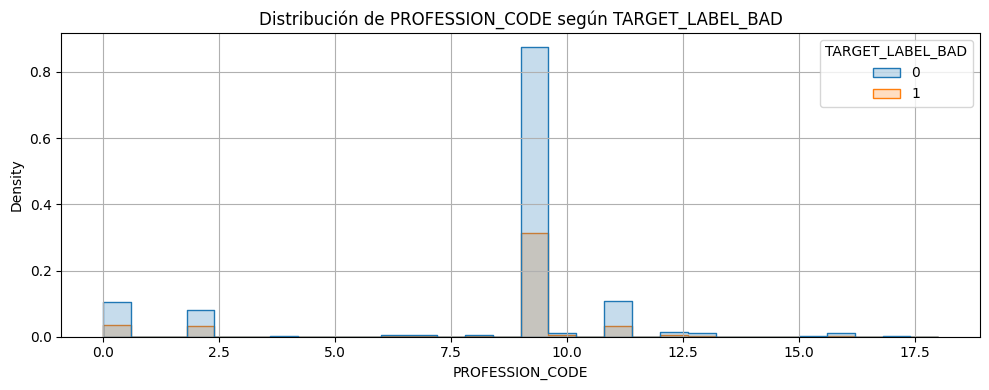

In [24]:
# Ejecutar analisis_para_months_in_the_job
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_months_in_the_job
analisis_para_months_in_the_job()

**Análisis para `PROFESSION_CODE`**
>
> tiene 15% de nulos.. ver cómo imputar
> *PROFESSION_CODE = 0 → 25.1% de deudores
>
>PROFESSION_CODE = 2 → 28.8% de deudores (más riesgoso)

>PROFESSION_CODE = 6 → 20.6% de deudores (menos riesgoso)

>Códigos como 3 y 4 también tienen diferencias, aunque con pocos casos.


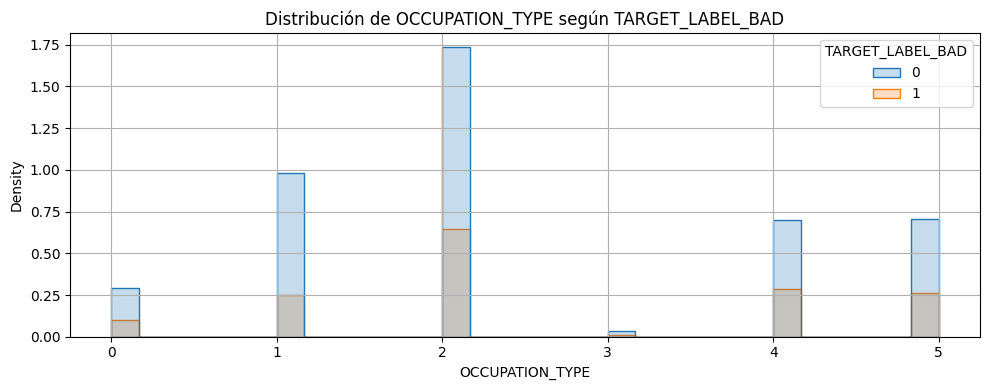

TARGET_LABEL_BAD  Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
OCCUPATION_TYPE                                                                    
0.0                                  74.00                    26.00            2788
1.0                                  79.68                    20.32            8742
2.0                                  72.80                    27.20           16947
3.0                                  75.55                    24.45             319
4.0                                  71.06                    28.94            7000
5.0                                  72.82                    27.18            6891


In [25]:
# Ejecutar analisis_para_profession_code
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_profession_code
analisis_para_profession_code()

**Análisis para `OCCUPATION_TYPE`**  
> * VER COMO IMPUTAR LOS NULOS
> * Coordinar con education_level?
> * OCCUPATION_TYPE = 1 → 20.3% de deudores (más bajo)
> * OCCUPATION_TYPE = 4 → 28.9% de deudores (más alto)
> * OCCUPATION_TYPE = 2 (el más frecuente) → 27.2%
> * OCCUPATION_TYPE = 3 y 0 tienen valores intermedios
> * está fuertemente correlacionado con el riesgo crediticio.

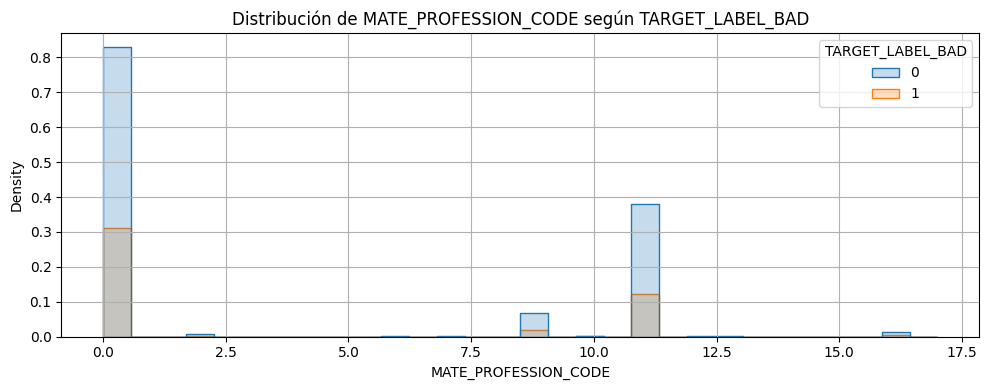

TARGET_LABEL_BAD      Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
MATE_PROFESSION_CODE                                                                   
0.0                                      72.76                    27.24           13632
2.0                                      82.73                    17.27             110
5.0                                     100.00                      NaN               1
6.0                                      75.00                    25.00              16
7.0                                     100.00                      NaN              11
8.0                                      85.71                    14.29               7
9.0                                      77.49                    22.51            1035
10.0                                     67.74                    32.26              31
11.0                                     75.62                    24.38            6005
12.0                            

In [26]:
# Ejecutar analisis_para_occupation_type
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_occupation_type
analisis_para_occupation_type()

**Análisis para `MATE_PROFESSION_CODE`**  
> *casi 60% de nulos
>
> 2.0 → solo 17.3% de deudores, parece más seguro.
>
> 6.0 → 25% de deudores, dentro de lo esperable.
>
> 5.0 y 7.0 no tienen deudores, pero tienen muy pocos casos (1 y 11 respectivamente) : no son estadísticamente confiables.
>


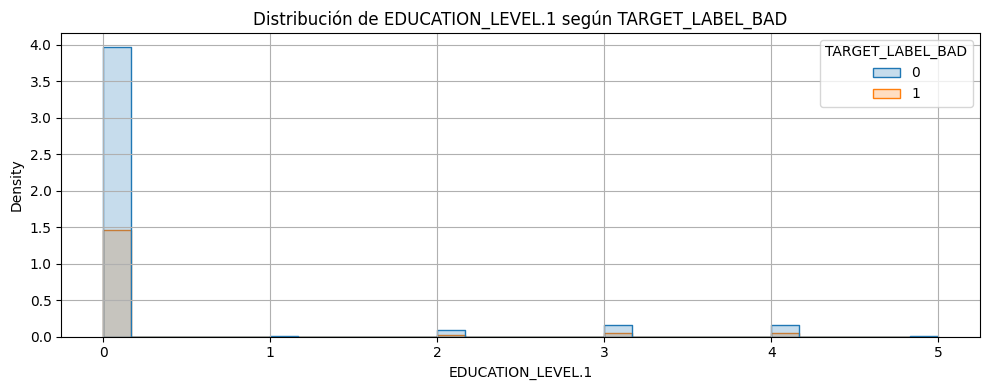

TARGET_LABEL_BAD       Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
EDUCATION_LEVEL.1_CAT                                                                   
0.0                                       73.01                    26.99           15995
1.0                                       87.50                    12.50              56
2.0                                       74.27                    25.73             342
3.0                                       78.42                    21.58             621
4.0                                       77.56                    22.44             615
5.0                                       93.94                     6.06              33
NULO                                      74.16                    25.84           32338


In [27]:
# Ejecutar analisis_para_mate_profession_code
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_mate_profession_code
analisis_para_mate_profession_code()

**Análisis para `EDUCATION_LEVEL.1`**  
> * CASI 60% NULOS
> *

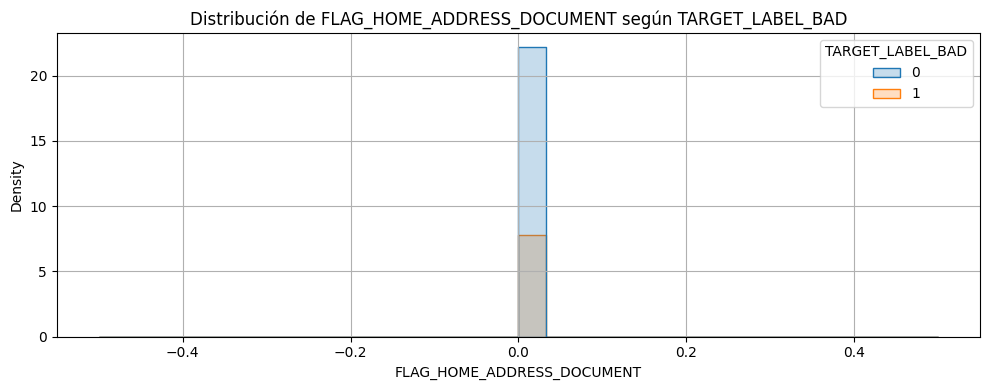

In [28]:
# Ejecutar analisis_para_education_level.1
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_education_level
analisis_para_education_level()

**Análisis para `FLAG_HOME_ADDRESS_DOCUMENT`**  
> *eliminar,siempre el mismo valor

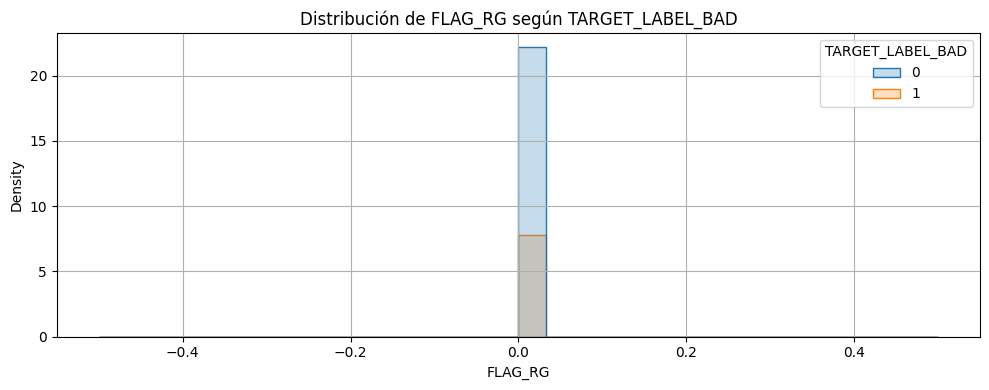

In [29]:
# Ejecutar analisis_para_flag_home_address_document
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_home_address_document
analisis_para_flag_home_address_document()

**Análisis para `FLAG_RG`**  
> *eliminar,siempre el mismo valor


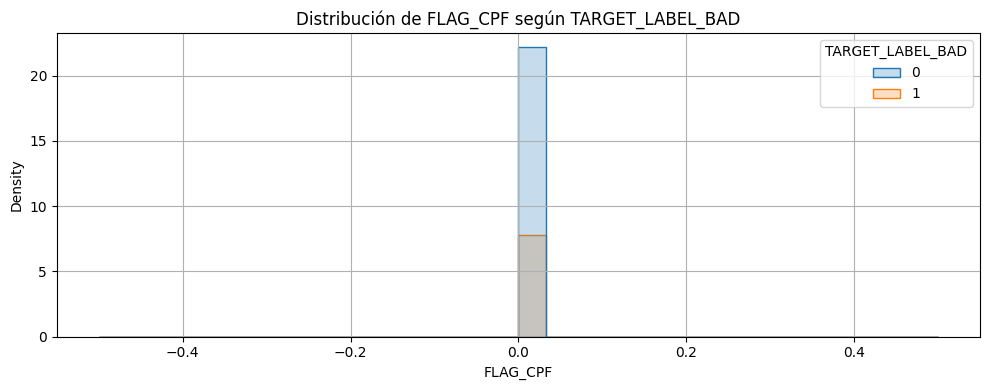

In [30]:
# Ejecutar analisis_para_flag_rg
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_rg
analisis_para_flag_rg()

**Análisis para `FLAG_CPF`**  
> *eliminar,siempre el mismo valor


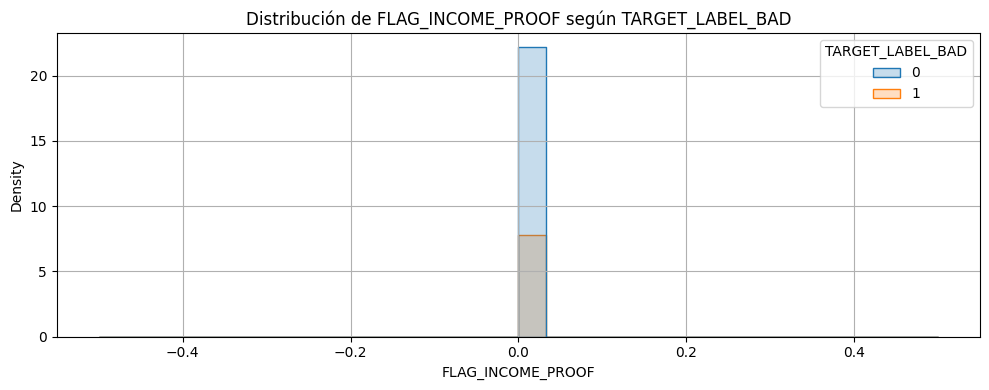

In [31]:
# Ejecutar analisis_para_flag_cpf
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_cpf
analisis_para_flag_cpf()

**Análisis para `FLAG_INCOME_PROOF`**  
> *eliminar,siempre el mismo valor


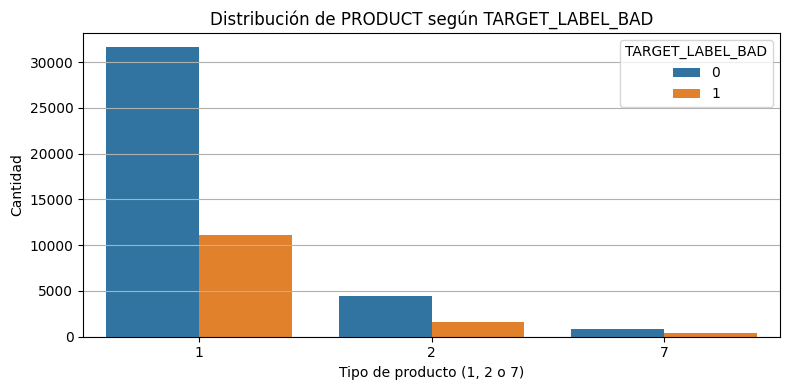

TARGET_LABEL_BAD  Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
PRODUCT_CAT                                                                        
1                                    74.06                    25.94           42690
2                                    74.06                    25.94            6015
7                                    68.42                    31.58            1295


In [32]:
# Ejecutar analisis_para_flag_income_proof
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_flag_income_proof
analisis_para_flag_income_proof()

**Análisis para `PRODUCT`**  
> *PRODUCT = 1 y PRODUCT = 2 tienen el mismo perfil: 25.94% de deudores.
>
>PRODUCT = 7 muestra un aumento notable de riesgo, con 31.58% de deudores.
>
> PRODUCT = 7 tiene pocos casos (1.295), muestra una tendencia hacia mayor morosidad

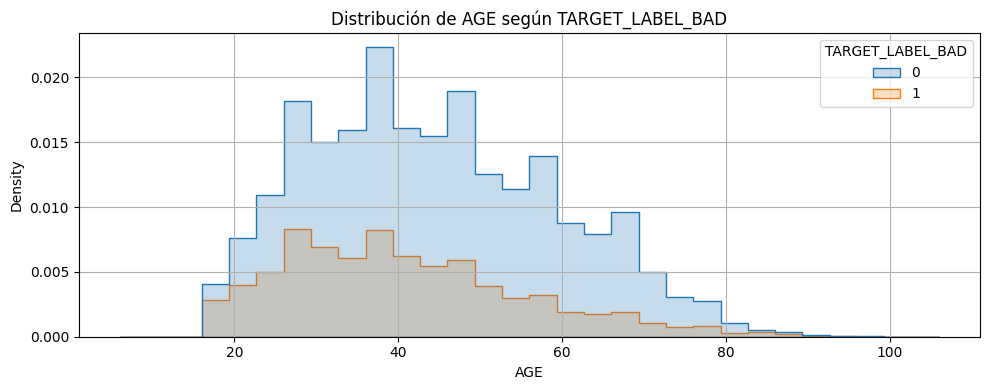

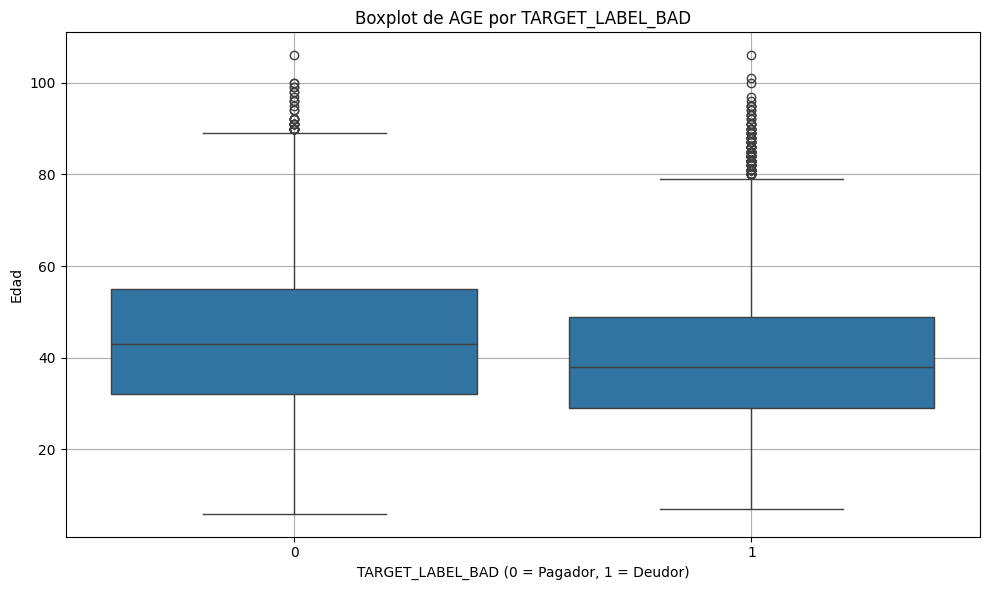

In [33]:
# Ejecutar analisis_para_product
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_product
analisis_para_product()

**Análisis para `AGE`**

> *Pagadores (TARGET_LABEL_BAD = 0): Edad media: 44.2 años

> * Deudores (TARGET_LABEL_BAD = 1): Edad media: 40.5 años
> *
> Más jóvenes son más deudores

In [34]:
# Ejecutar analisis_para_age
from credit_risk_analysis.EDA.eda_numerico_scripts import analisis_para_age
analisis_para_age()

TARGET_LABEL_BAD                  1.000000
PAYMENT_DAY                       0.070633
OCCUPATION_TYPE                   0.040216
PRODUCT                           0.019293
RESIDENCE_TYPE                    0.019168
QUANT_DEPENDANTS                  0.012157
QUANT_SPECIAL_BANKING_ACCOUNTS    0.011997
QUANT_BANKING_ACCOUNTS            0.011997
QUANT_CARS                        0.011706
OTHER_INCOMES                     0.004442
PERSONAL_MONTHLY_INCOME           0.002819
FLAG_DINERS                       0.002240
FLAG_OTHER_CARDS                  0.001410
FLAG_AMERICAN_EXPRESS             0.000337
NACIONALITY                      -0.000952
POSTAL_ADDRESS_TYPE              -0.002423
PERSONAL_ASSETS_VALUE            -0.003886
FLAG_VISA                        -0.005398
MONTHS_IN_THE_JOB                -0.007073
FLAG_EMAIL                       -0.008067
PROFESSION_CODE                  -0.011593
FLAG_MASTERCARD                  -0.017658
MONTHS_IN_RESIDENCE              -0.029336
MARITAL_STA